In [73]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("oryx_data/daily_count.csv")

In [75]:
df

,country,equipment_type,destroyed,abandoned,captured,damaged,type_total,date_recorded,destroyed_diff,abandoned_diff,captured_diff,damaged_diff,type_total_diff,destroyed_diff_diff,abandoned_diff_diff,captured_diff_diff,damaged_diff_diff,type_total_diff_diff
0,Russia,Aircraft,0,0,0,0,0,2022-02-23,0,0,0,0,0,0,0,0,0,0
1,Russia,Aircraft,13,0,0,0,13,2022-03-19,13,0,0,0,13,13,0,0,0,13
2,Russia,Aircraft,15,0,0,0,15,2022-03-26,2,0,0,0,2,-11,0,0,0,-11
3,Russia,Aircraft,15,0,0,0,15,2022-03-27,0,0,0,0,0,-2,0,0,0,-2
4,Russia,Aircraft,16,0,0,0,16,2022-03-28,1,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Ukraine,"Trucks, Vehicles, and Jeeps",783,15,183,30,1011,2024-11-20,5,0,0,0,5,0,0,0,0,0
535,Ukraine,"Trucks, Vehicles, and Jeeps",784,15,183,30,1012,2024-11-21,1,0,0,0,1,0,0,0,0,0
536,Ukraine,Unmanned Combat Aerial Vehicles,26,0,1,0,27,2024-09-30,0,0,0,0,0,0,0,0,0,0
537,Ukraine,Unmanned Combat Aerial Vehicles,27,0,1,0,28,2024-11-11,1,0,0,0,1,0,0,0,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   country               539 non-null    object
 1   equipment_type        539 non-null    object
 2   destroyed             539 non-null    int64 
 3   abandoned             539 non-null    int64 
 4   captured              539 non-null    int64 
 5   damaged               539 non-null    int64 
 6   type_total            539 non-null    int64 
 7   date_recorded         539 non-null    object
 8   destroyed_diff        539 non-null    int64 
 9   abandoned_diff        539 non-null    int64 
 10  captured_diff         539 non-null    int64 
 11  damaged_diff          539 non-null    int64 
 12  type_total_diff       539 non-null    int64 
 13  destroyed_diff_diff   539 non-null    int64 
 14  abandoned_diff_diff   539 non-null    int64 
 15  captured_diff_diff    539 non-null    in

In [77]:
df.shape

(539, 18)

In [78]:
df['country'].value_counts()

country
Russia     352
Ukraine    187
Name: count, dtype: int64

In [79]:
df['equipment_type'].value_counts().tail(100)

equipment_type
Aircraft                                                                                                                                                    86
All Types                                                                                                                                                   83
Infantry Fighting Vehicles                                                                                                                                  33
Trucks, Vehicles, and Jeeps                                                                                                                                 31
Armoured Personnel Carriers                                                                                                                                 28
                                                                                                                                                            ..
Losses of Armoured Combat Vehic

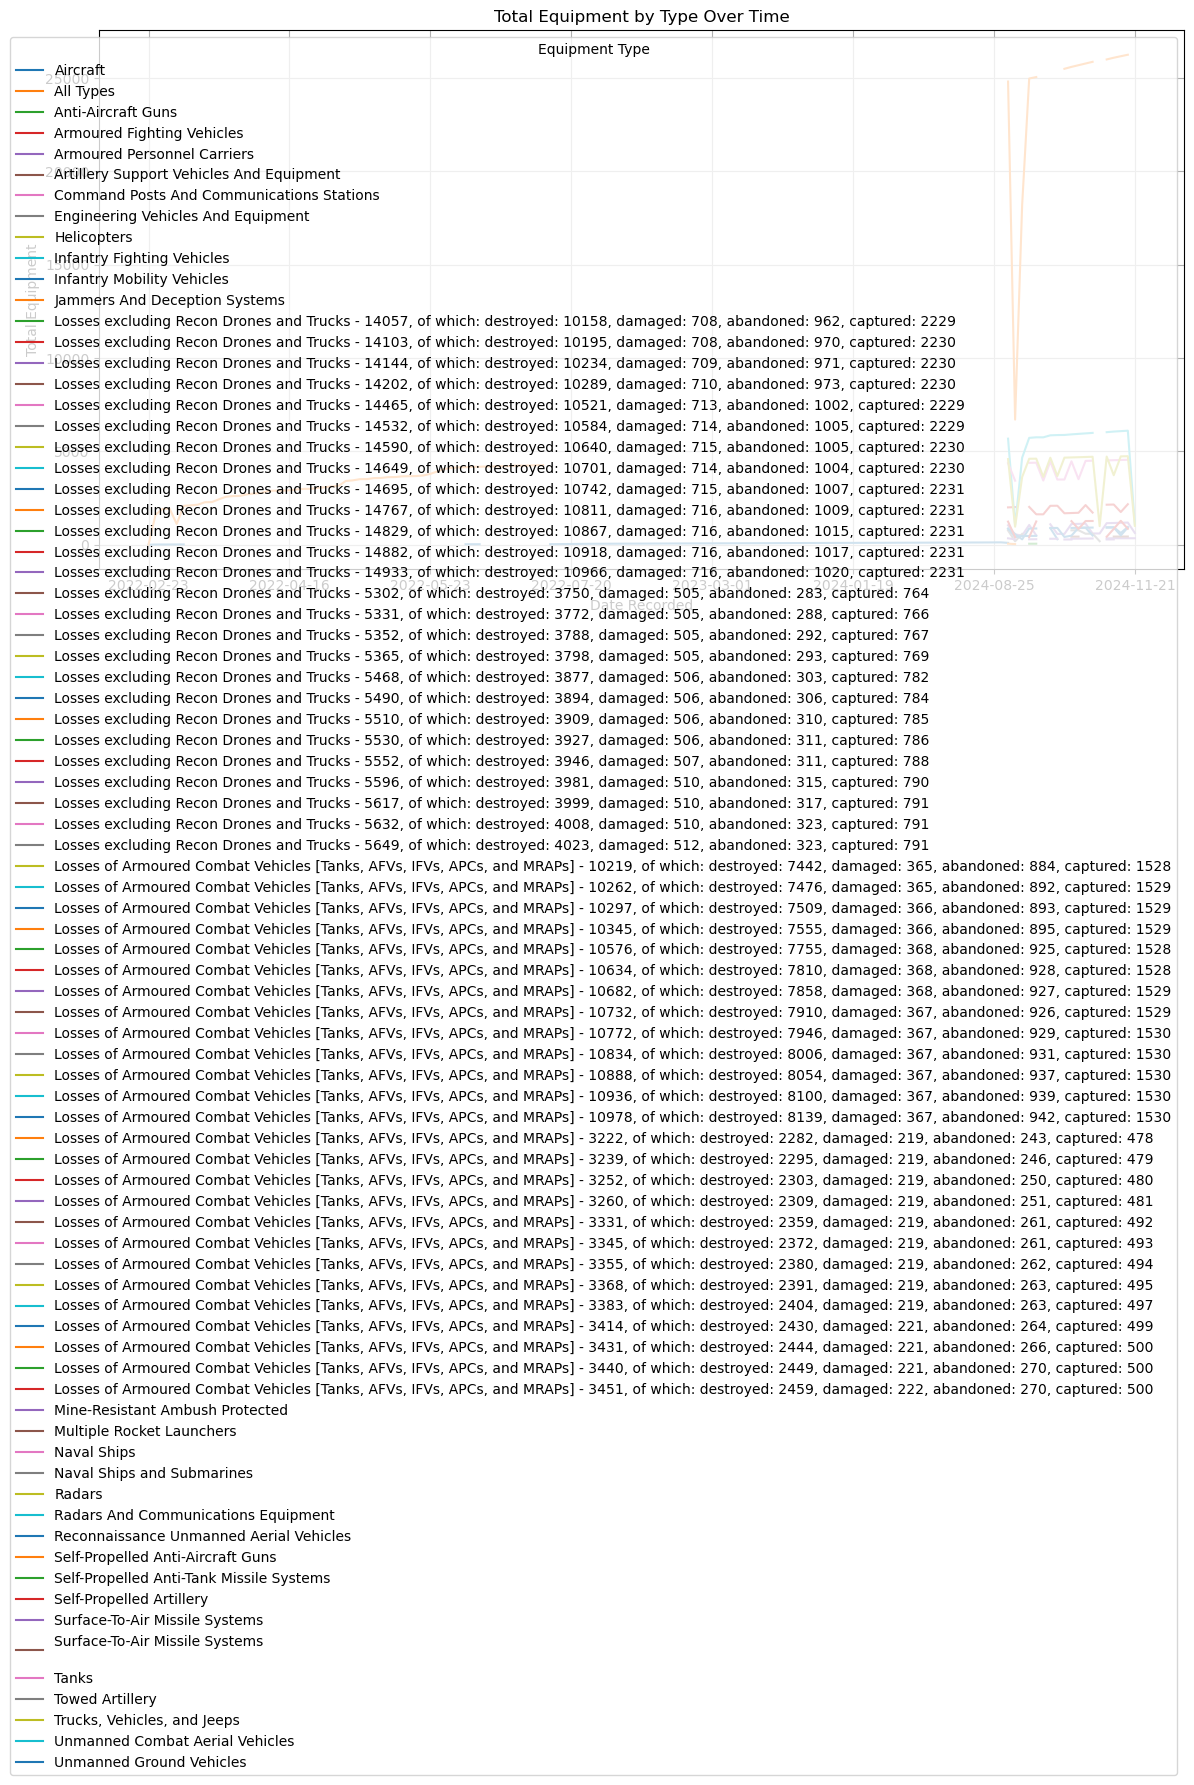

In [80]:
# Group by date_recorded and equipment_type, then sum the counts
grouped_df = df.groupby(['date_recorded', 'equipment_type']).sum().reset_index()

# Pivot the dataframe to have equipment types as columns
pivot_df = grouped_df.pivot(index='date_recorded', columns='equipment_type', values='type_total')

# Plot the data
pivot_df.plot(kind='line', figsize=(14, 7))
plt.xlabel('Date Recorded')
plt.ylabel('Total Equipment')
plt.title('Total Equipment by Type Over Time')
plt.legend(title='Equipment Type')
plt.grid(True)
plt.show()

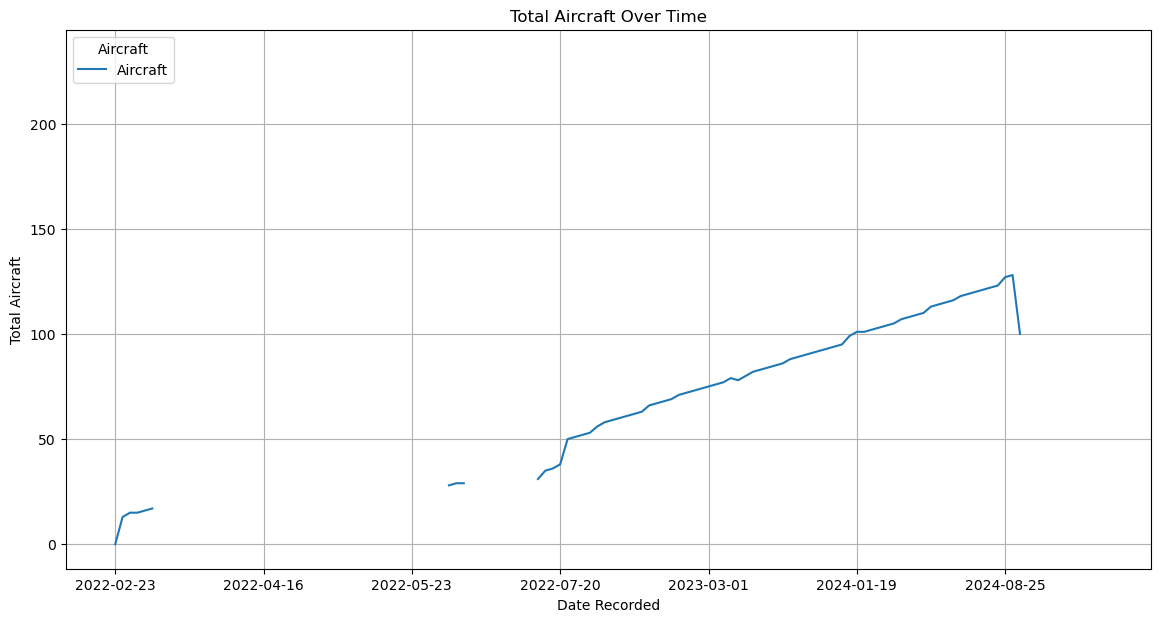

In [81]:
# Filter the pivot_df to include only the 'Aircraft' column
aircraft_df = pivot_df[['Aircraft']]

# Plot the data
aircraft_df.plot(kind='line', figsize=(14, 7))
plt.xlabel('Date Recorded')
plt.ylabel('Total Aircraft')
plt.title('Total Aircraft Over Time')
plt.legend(title='Aircraft')
plt.grid(True)
plt.show()

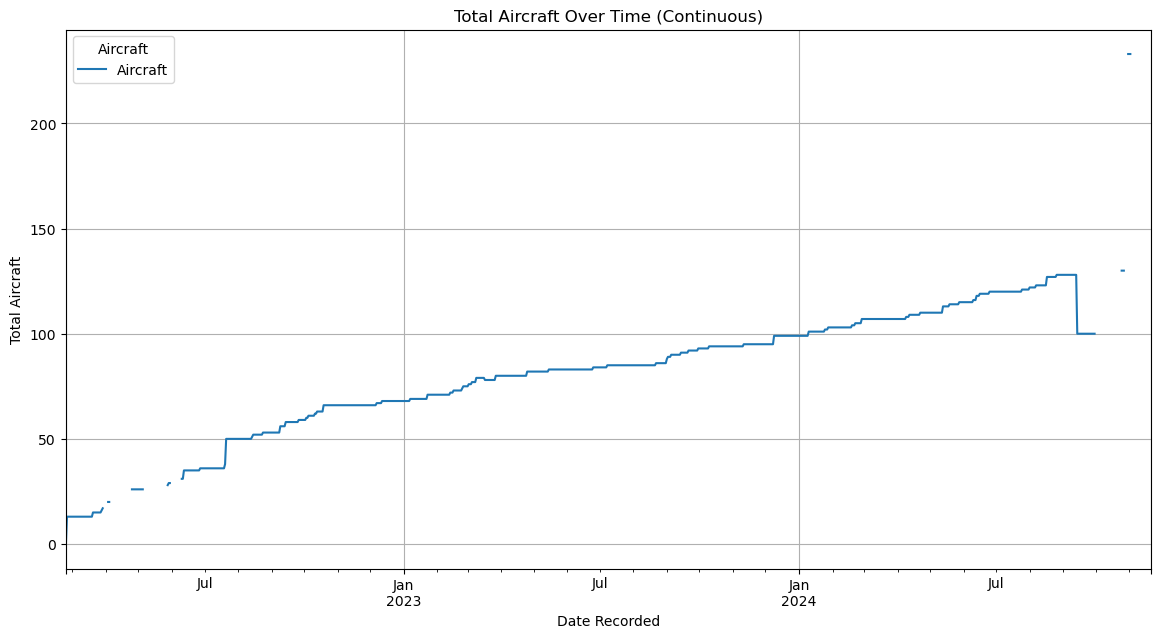

In [82]:
aircraft_df = pivot_df[['Aircraft']]

# Ensure the index is a DatetimeIndex
aircraft_df.index = pd.to_datetime(aircraft_df.index)

# Sort the index to ensure data is sorted by date
aircraft_df = aircraft_df.sort_index()

# Resample the aircraft_df to ensure continuous time series data
aircraft_df_resampled = aircraft_df.resample('D').bfill()

# Plot the resampled data
aircraft_df_resampled.plot(kind='line', figsize=(14, 7))
plt.xlabel('Date Recorded')
plt.ylabel('Total Aircraft')
plt.title('Total Aircraft Over Time (Continuous)')
plt.legend(title='Aircraft')
plt.grid(True)
plt.show()

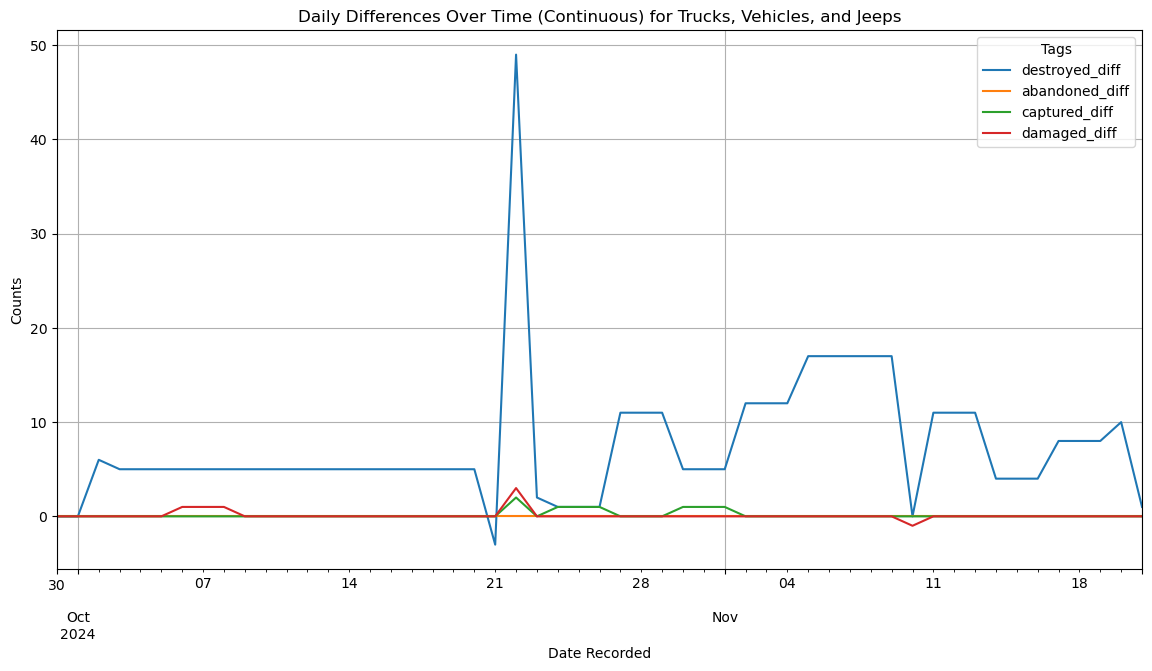

In [83]:

trucks_df = df[df['equipment_type'] == 'Trucks, Vehicles, and Jeeps']
# diff_columns = trucks_df[['destroyed', 'abandoned', 'captured', 'damaged']]
diff_columns = trucks_df[['destroyed_diff', 'abandoned_diff', 'captured_diff', 'damaged_diff']]
diff_columns.index = pd.to_datetime(trucks_df['date_recorded'])
diff_columns = diff_columns.sort_index()
diff_columns_cumulated = diff_columns.groupby(diff_columns.index).sum()
diff_columns_resampled = diff_columns_cumulated.resample('D').ffill()

# Plot the resampled data
diff_columns_resampled.plot(kind='line', figsize=(14, 7))
plt.xlabel('Date Recorded')
plt.ylabel('Counts')
plt.title('Daily Differences Over Time (Continuous) for Trucks, Vehicles, and Jeeps')
plt.legend(title='Tags')
plt.grid(True)
plt.show()